# calculate the cost 

In [4]:
import math
# Edit these parameters to try different loss
# measurements. Rerun this cell when done
# Your Y will be calculated as Y=wX+b, so
# if w=3, and b=-1, then Y=3x-1

w = 3
b = -1

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]
myY = []


for thisX in x:
    
    thisY = (w*thisX)+b
    myY.append(thisY)

print("Real Y is " + str(y))
print("My Y is   " + str(myY))

# let's calculate the loss
total_square_error = 0
for i in range(0, len(y)):
    square_error = (y[i] - myY[i]) ** 2
    total_square_error += square_error

print("My loss is: " + str(math.sqrt(total_square_error)))

Real Y is [-3, -1, 1, 3, 5, 7]
My Y is   [-4, -1, 2, 5, 8, 11]
My loss is: 5.5677643628300215


## Gradient descent 

In [5]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
  # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
  # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
    def __init__(self):
        
    # Initialize the weights
        self.w = tf.Variable(INITIAL_W)
        self.b = tf.Variable(INITIAL_B)

    def __call__(self, x):
        return self.w * x + self.b

In [8]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
    losses.append(current_loss)
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-0.41 b=5.86, loss=27.47032
Epoch  2: w=-0.02 b=5.28, loss=22.43888
Epoch  3: w=0.16 b=4.69, loss=18.46284
Epoch  4: w=0.33 b=4.16, loss=15.19137
Epoch  5: w=0.49 b=3.68, loss=12.49958
Epoch  6: w=0.63 b=3.25, loss=10.28476
Epoch  7: w=0.76 b=2.85, loss=8.46238
Epoch  8: w=0.87 b=2.50, loss=6.96291
Epoch  9: w=0.98 b=2.17, loss=5.72914
Epoch 10: w=1.07 b=1.88, loss=4.71398
Epoch 11: w=1.16 b=1.61, loss=3.87870
Epoch 12: w=1.24 b=1.37, loss=3.19143
Epoch 13: w=1.31 b=1.15, loss=2.62593
Epoch 14: w=1.37 b=0.95, loss=2.16064
Epoch 15: w=1.43 b=0.77, loss=1.77779
Epoch 16: w=1.48 b=0.60, loss=1.46278
Epoch 17: w=1.53 b=0.45, loss=1.20359
Epoch 18: w=1.57 b=0.32, loss=0.99032
Epoch 19: w=1.61 b=0.20, loss=0.81484
Epoch 20: w=1.65 b=0.08, loss=0.67046
Epoch 21: w=1.68 b=-0.02, loss=0.55166
Epoch 22: w=1.71 b=-0.11, loss=0.45391
Epoch 23: w=1.74 b=-0.19, loss=0.37348
Epoch 24: w=1.76 b=-0.27, loss=0.30730
Epoch 25: w=1.79 b=-0.33, loss=0.2

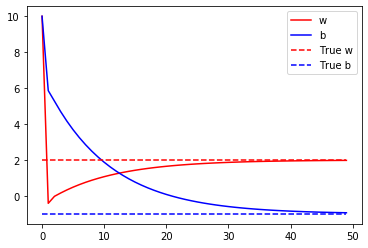

In [9]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()